In [2]:
#!pip3 install qiskit ipywidgets

In [3]:
#!pip3 install pylatexenc

## Qubit Tunggal

In [4]:
import numpy as np
import math
from math import sqrt
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit import BasicAer
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import transpile

### Multiple Qubit

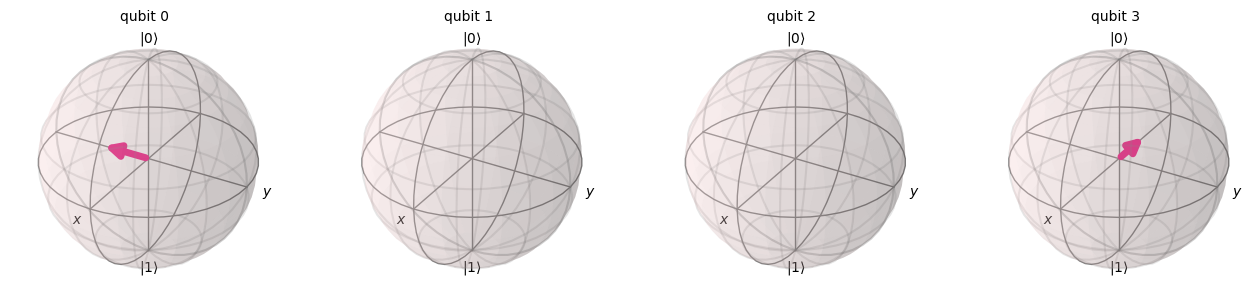

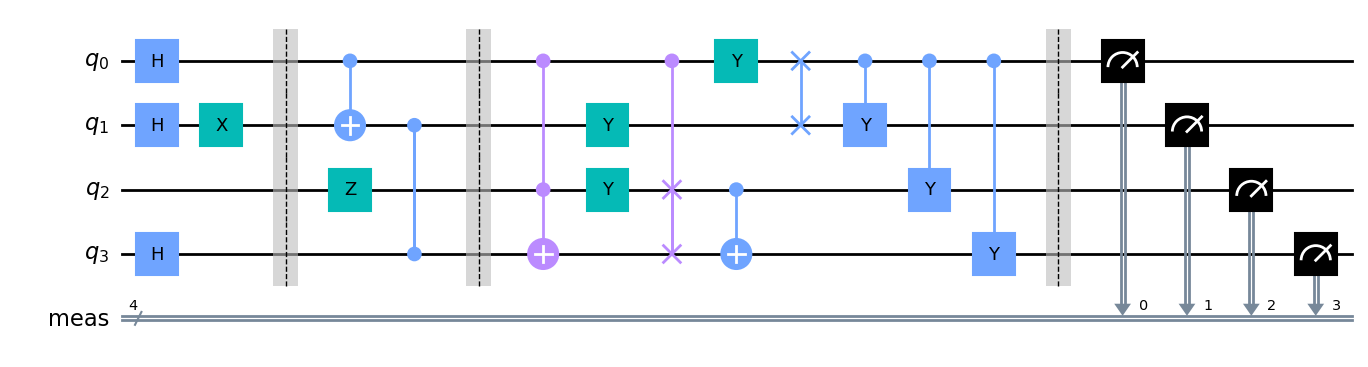

In [5]:
qc = QuantumCircuit(4)
qc.h([0,1,3])                                 
qc.x(1)                                 
qc.barrier()
qc.z(2)                                 
qc.cx(0,1)                                 
qc.cz(1,3)   
qc.barrier()
qc.ccx(0,2,3)
qc.y([1,2])
qc.cswap(0,2,3)                      # Control swap,       q0 = kontrol            q2 dan q3 melakukan swap
qc.cnot(2,3)
qc.y(0)
qc.swap(0,1)
qc.cy(0,[1,2,3])                     #Control Y,  q0 = kontrol         q1,q2,q3 = target
display(plot_bloch_multivector(qc))
qc.measure_all()                          
display(qc.draw(output="mpl"))            

In [6]:
simulator = Aer.get_backend("aer_simulator")
qc.save_statevector()
tqc = transpile(qc, simulator)
job = simulator.run(tqc)
result = job.result()
statevector = result.get_statevector(tqc, 4)
print(statevector)

Statevector([ 0.+0.j,  1.+0.j,  0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
             -0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j, -0.+0.j, -0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j],
            dims=(2, 2, 2, 2))


{'0001': 115, '1001': 127, '0100': 117, '0111': 130, '1011': 139, '1000': 108, '0110': 126, '1110': 138}


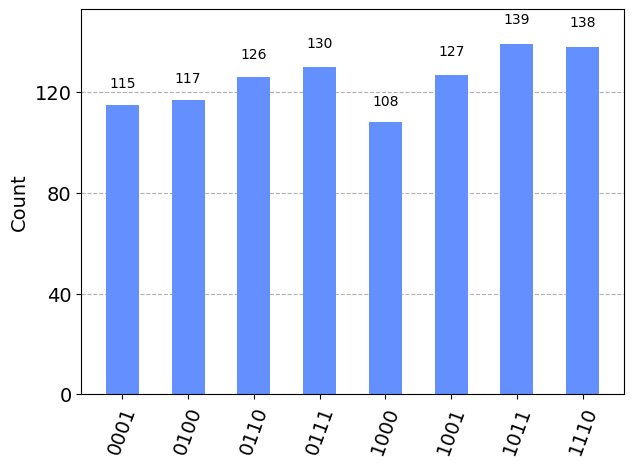

In [7]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
# Return counts
counts = job.result().get_counts(qc)
print(counts)
plot_histogram(counts)